<a href="https://colab.research.google.com/github/kshimoji8/DeepLearningMugenKnock/blob/master/AI_Workshop_Japan_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI Hands-On Workshop** <br>

Introduction to Convolutional Neural Networks for binary image classification<br>

**Haris Sair, MD**<br>
*Associate Professor of Radiology<br>
Director, Division of Neuroradiology<br>
The Russell H. Morgan Department of Radiology and Radiological Science<br>
Johns Hopkins University School of Medicine*

<small>copyright 2019 Haris Sair</small>


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x

import tensorflow as tf

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Copy data folder to own Google Drive:
https://drive.google.com/open?id=1jbsbrfuYFZfFw55athSSUv7mzEP1_SrB

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
base_dir = ('/content/drive/My Drive/classification')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


In [0]:
base_dir

'/content/drive/My Drive/classification'

In [0]:
train_normal_dir = os.path.join(train_dir, 'normal')  # directory with our training cat pictures
train_stroke_dir = os.path.join(train_dir, 'stroke')  # directory with our training dog pictures
validation_normal_dir = os.path.join(validation_dir, 'normal')  # directory with our validation cat pictures
validation_stroke_dir = os.path.join(validation_dir, 'stroke')  # directory with our validation dog pictures

In [0]:
train_normal_dir

'/content/drive/My Drive/classification/train/normal'

In [0]:
num_normal_tr = len(os.listdir(train_normal_dir))
num_stroke_tr = len(os.listdir(train_stroke_dir))

num_normal_val = len(os.listdir(validation_normal_dir))
num_stroke_val = len(os.listdir(validation_stroke_dir))

total_train = num_normal_tr + num_stroke_tr
total_val = num_normal_val + num_stroke_val

In [0]:
print('total training normal images:', num_normal_tr)
print('total training stroke images:', num_stroke_tr)

print('total validation normal images:', num_normal_val)
print('total validation stroke images:', num_stroke_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training normal images: 6
total training stroke images: 6
total validation normal images: 2
total validation stroke images: 2
--
Total training images: 12
Total validation images: 4


In [0]:
BATCH_SIZE = 1
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [0]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 10 images belonging to 2 classes.


In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 4 images belonging to 2 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
epochs=30
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/30
12/12 [==============================] - 7s 577ms/step - loss: 1.2505 - accuracy: 0.5000 - val_loss: 0.7090 - val_accuracy: 0.5000
Epoch 2/30
12/12 [==============================] - 0s 35ms/step - loss: 0.7614 - accuracy: 0.4167 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 3/30
12/12 [==============================] - 0s 37ms/step - loss: 0.6967 - accuracy: 0.5833 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 4/30
12/12 [==============================] - 0s 37ms/step - loss: 0.6907 - accuracy: 0.4167 - val_loss: 0.6949 - val_accuracy: 0.2500
Epoch 5/30
12/12 [==============================] - 0s 36ms/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 6/30
12/12 [==============================] - 1s 44ms/step - loss: 0.7080 - accuracy: 0.4167 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 7/30
12/12 [==============================] - 0s 37ms/step - loss: 0.6874 - accuracy: 0.5833 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 8/30
1

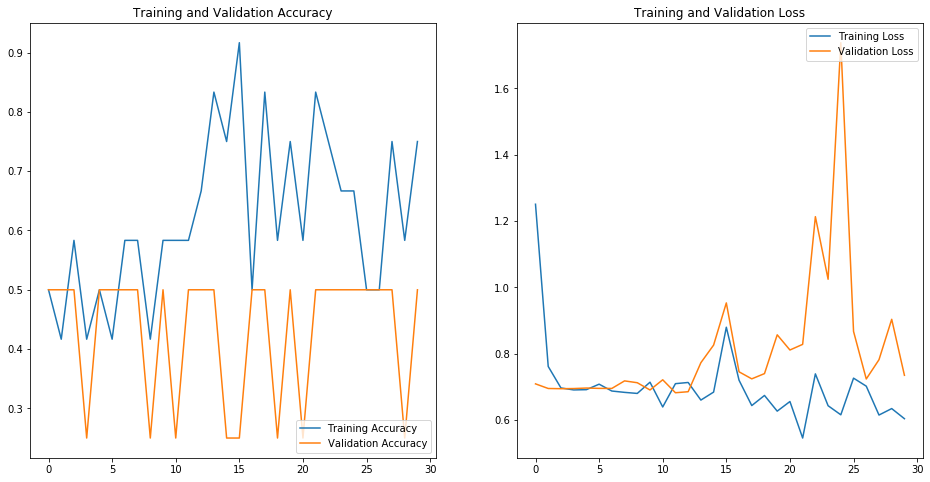

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()